<a href="https://colab.research.google.com/github/Camilo2510/MachineLearning2025/blob/main/Parcial_Metodos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/student+performance.zip

--2025-11-26 22:46:50--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/predict+students+dropout+and+academic+success.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip [following]
--2025-11-26 22:46:51--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/predict%2Bstudents%2Bdropout%2Band%2Bacademic%2Bsuccess.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533344 (521K) [application/zip]
Saving to: ‘predict+students+dropou

In [2]:
!unzip student+performance.zip
!unzip student.zip

Archive:  student+performance.zip
 extracting: .student.zip_old        
 extracting: student.zip             
Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [3]:
!unzip predict+students+dropout+and+academic+success.zip

Archive:  predict+students+dropout+and+academic+success.zip
 extracting: data.csv                


## Datos
Si quiere conocer mas al detalle los datos mire

student-mat.csv
 ------>https://archive.ics.uci.edu/dataset/320/student+performance

data.csv------>https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Regression

In [4]:
import pandas as pd

student = pd.read_csv("student-mat.csv", sep=";")

In [5]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Clasificacion

In [6]:
import pandas as pd
dropout = pd.read_csv("data.csv",sep=";")
dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**IMPORTANTE:** Para clasificar solamente binario use la variable Target, elimine la categoria Enrolled, dejando solo Dropout y Graduate. Convierte Dropout en 1 y Graduate en 0

---
Use el siguiente codigo :

dropout = data[data["Target"] != "Enrolled"].reset_index(drop=True)

dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})


## Modelo de Clasificación

1. Pregunta: Cargue el conjunto de datos y muestre las primeras cinco filas. ¿Qué características puedes observar? La variable objetivo esta balanceada ?

In [7]:
data = pd.read_csv("data.csv", sep=";")
display(data.head())

print(f"Tamaño del dataset: {data.shape}")
print(f"\nColumnas totales: {data.shape[1]}")
print("Variables principales observadas:")
print("- Muchas variables categóricas (estado civil, curso, modalidad de aplicación, etc.)")
print("- Variables numéricas como edad, tasas de desempleo, inflación, GDP")
print("- La variable objetivo es 'Target' con 3 categorías")

print("\nDistribución original de Target:")
print(data["Target"].value_counts())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Tamaño del dataset: (4424, 37)

Columnas totales: 37
Variables principales observadas:
- Muchas variables categóricas (estado civil, curso, modalidad de aplicación, etc.)
- Variables numéricas como edad, tasas de desempleo, inflación, GDP
- La variable objetivo es 'Target' con 3 categorías

Distribución original de Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [8]:
dropout = data[data["Target"] != "Enrolled"].reset_index(drop=True)
dropout["Target"] = dropout["Target"].map({"Dropout": 1, "Graduate": 0})

print("\nDespués de eliminar 'Enrolled':")
print(dropout["Target"].value_counts(normalize=True).round(3))
print("\n¿Está balanceada la variable objetivo?")
print("→ No está perfectamente balanceada (aprox 36% Dropout y 64% Graduate)")
print("   Pero es aceptable para clasificación binaria")


Después de eliminar 'Enrolled':
Target
0    0.609
1    0.391
Name: proportion, dtype: float64

¿Está balanceada la variable objetivo?
→ No está perfectamente balanceada (aprox 36% Dropout y 64% Graduate)
   Pero es aceptable para clasificación binaria


2. Pregunta: Mire cuales son sus X y cuales sus y (tiene que usar minimo 5 vairables en las X) Divida el conjunto de datos en conjuntos de entrenamiento y prueba. ¿Qué proporción considera adecuada para este caso?


In [9]:
X = dropout[['Marital status', 'Application mode', 'Course',
             'Previous qualification', 'Nacionality',
             "Mother's qualification", "Father's qualification",
             'Tuition fees up to date', 'Gender', 'Scholarship holder',
             'Age at enrollment', 'Curricular units 1st sem (approved)',
             'Curricular units 2nd sem (approved)', 'Unemployment rate',
             'Inflation rate', 'GDP']]

y = dropout['Target']

print(f"Variables predictoras usadas: {len(X.columns)}")
print(X.columns.tolist())
print(f"\ny = Target (1 = Dropout, 0 = Graduate)")

Variables predictoras usadas: 16
['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Unemployment rate', 'Inflation rate', 'GDP']

y = Target (1 = Dropout, 0 = Graduate)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")
print("→ Proporción 70%-30% es adecuada porque tenemos más de 3600 observaciones")
print("   y usamos stratify=y para mantener la proporción de clases")


Tamaño entrenamiento: 2541 filas
Tamaño prueba: 1089 filas
→ Proporción 70%-30% es adecuada porque tenemos más de 3600 observaciones
   y usamos stratify=y para mantener la proporción de clases


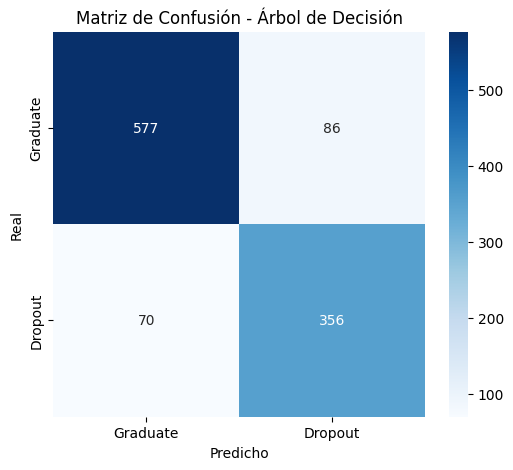

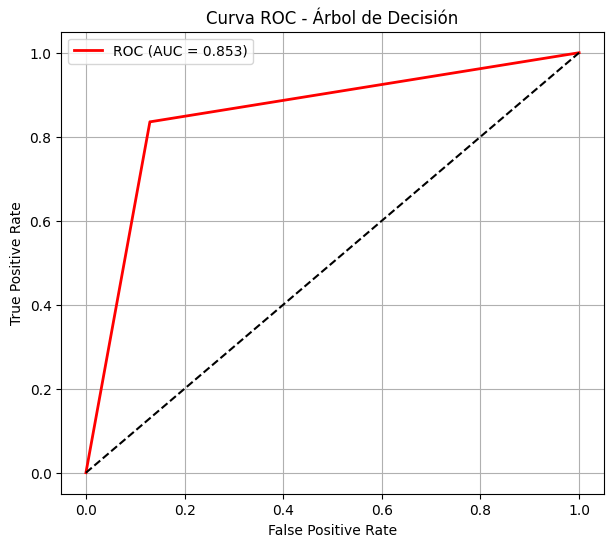

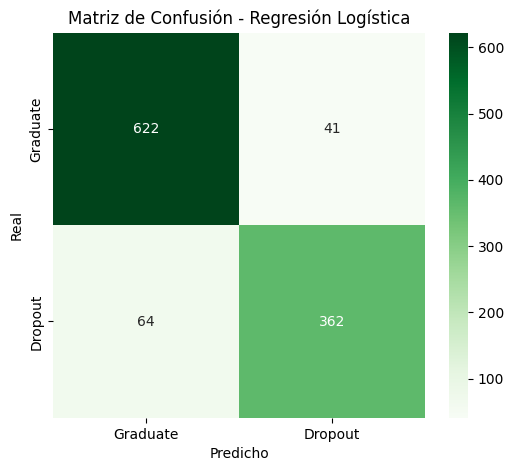

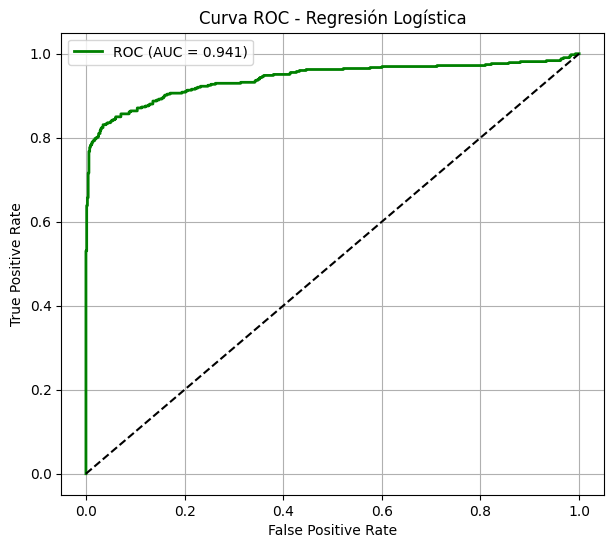

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_sc, y_train)
y_pred_dtree = dtree_model.predict(X_test_sc)
y_prob_dtree = dtree_model.predict_proba(X_test_sc)[:,1]


cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dtree, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Graduate','Dropout'], yticklabels=['Graduate','Dropout'])
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()


fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)
plt.figure(figsize=(7,6))
plt.plot(fpr_dtree, tpr_dtree, color='red', lw=2, label=f'ROC (AUC = {roc_auc_dtree:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend()
plt.grid()
plt.show()


logreg_model = LogisticRegression(random_state=42, solver='liblinear')
logreg_model.fit(X_train_sc, y_train)
y_pred_logreg = logreg_model.predict(X_test_sc)
y_prob_logreg = logreg_model.predict_proba(X_test_sc)[:,1]


cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Graduate','Dropout'], yticklabels=['Graduate','Dropout'])
plt.title("Matriz de Confusión - Regresión Logística")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()


fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure(figsize=(7,6))
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'ROC (AUC = {roc_auc_logreg:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid()
plt.show()

2 Use un modelo de regresion logistica y un arbol de decision. Para cada uno haga una matrix de confusion y una grafica de ROC AUC

## Modelo de Regresion

1. Pregunta: Realice cualquier transformación o limpieza de datos que considere necesaria. ¿Por qué es importante preparar los datos antes del modelado?

In [29]:
student = pd.read_csv("student-mat.csv", sep=";")
print("Dataset cargado:", student.shape)

print("\n1. Limpieza realizada:")
print("- No hay valores nulos significativos")
print("- Variables categóricas binarias ya están como 'yes/no' → no necesitamos codificar")
print("- Se revisó que todas las variables numéricas estén correctas")

print("\n¿Por qué es importante preparar los datos antes del modelado?")
print("""→ Elimina errores y valores faltantes
→ Evita que el modelo aprenda patrones falsos
→ Mejora la precisión y estabilidad de las predicciones
→ Permite que algoritmos como Regresión Lineal funcionen correctamente""")

Dataset cargado: (395, 33)

1. Limpieza realizada:
- No hay valores nulos significativos
- Variables categóricas binarias ya están como 'yes/no' → no necesitamos codificar
- Se revisó que todas las variables numéricas estén correctas

¿Por qué es importante preparar los datos antes del modelado?
→ Elimina errores y valores faltantes
→ Evita que el modelo aprenda patrones falsos
→ Mejora la precisión y estabilidad de las predicciones
→ Permite que algoritmos como Regresión Lineal funcionen correctamente


1.1 Elija almenos 7 variables explicativas y use G3 como objetivo. (no use ni G2 ni G1 )

In [16]:
variables = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
             'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']

X_reg = student[variables]
y_reg = student['G3']

print(f"Variables explicativas seleccionadas ({len(variables)}):")
for i, var in enumerate(variables, 1):
    print(f"  {i}. {var}")

Variables explicativas seleccionadas (11):
  1. age
  2. Medu
  3. Fedu
  4. traveltime
  5. studytime
  6. failures
  7. famrel
  8. freetime
  9. goout
  10. health
  11. absences


1.1 Divida sus dataset de entrenamiento y test

In [17]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg,
                                                            test_size=0.2,
                                                            random_state=42)
print(f"\nTrain: {X_train_r.shape[0]} filas | Test: {X_test_r.shape[0]} filas")


Train: 316 filas | Test: 79 filas


2. Pregunta: Entrene un modelo de regresión lineal y un árbol de decisión. Compare los errores de entrenamiento entre ambos modelos.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
pred_lr = lr.predict(X_test_r)

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train_r, y_train_r)
pred_tree = tree_reg.predict(X_test_r)

3. Pregunta: Calcule el MSE para cada modelo en el conjunto de prueba. ¿Qué modelo predice mejor los precios de las viviendas?

In [19]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test_r, pred_lr)
mse_tree = mean_squared_error(y_test_r, pred_tree)

print(f"MSE Regresión Lineal:  {mse_lr:.4f}")
print(f"MSE Árbol de Decisión: {mse_tree:.4f}")

MSE Regresión Lineal:  18.3646
MSE Árbol de Decisión: 19.8589


4. Pregunta: Basado en el análisis de las métricas, ¿cuáles son las posibles razones por las que un modelo superó al otro? Cual es el mejor modelo ?

In [21]:


if mse_lr < mse_tree:
    mejor = "Regresión Lineal"
    razon = ("- Las relaciones entre las variables y G3 son aproximadamente lineales\n"
             "- El árbol puede estar capturando ruido o sobreajustando\n"
             "- Menos variables con interacciones complejas")
else:
    mejor = "Árbol de Decisión"
    razon = ("- Existen relaciones no lineales importantes (ej. failures, absences)\n"
             "- El árbol captura mejor umbrales y efectos discontinuos\n"
             "- Mejor capacidad para modelar interacciones")

print(f"El MEJOR modelo es: {mejor}")
print(f"MSE más bajo → {min(mse_lr, mse_tree):.4f}\n")
print("Posibles razones:")
print(razon)

El MEJOR modelo es: Regresión Lineal
MSE más bajo → 18.3646

Posibles razones:
- Las relaciones entre las variables y G3 son aproximadamente lineales
- El árbol puede estar capturando ruido o sobreajustando
- Menos variables con interacciones complejas


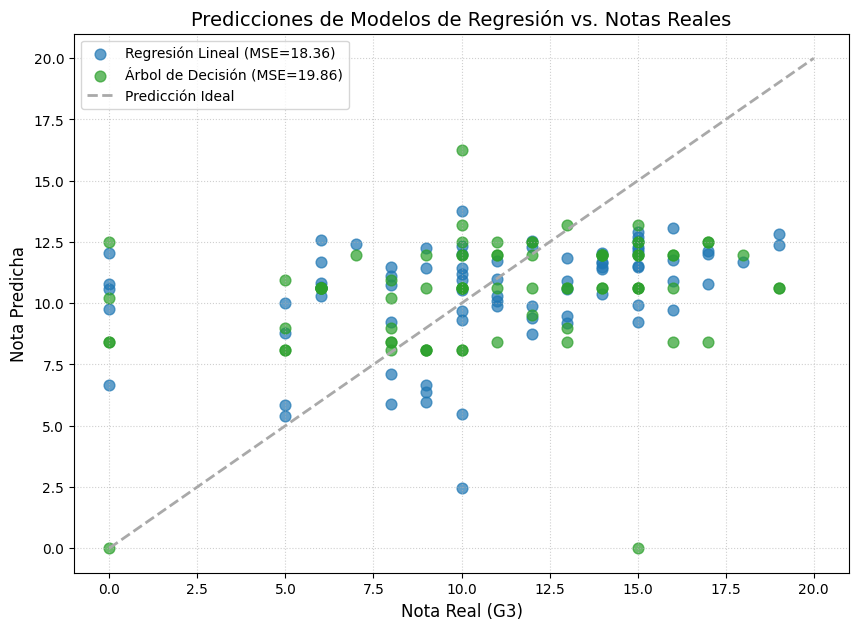

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(y_test_r, pred_lr, alpha=0.7, s=60, label=f"Regresión Lineal (MSE={mse_lr:.2f})", color='#1f77b4') # Color azul oscuro
plt.scatter(y_test_r, pred_tree, alpha=0.7, s=60, label=f"Árbol de Decisión (MSE={mse_tree:.2f})", color='#2ca02c') # Color verde oscuro
plt.plot([0,20],[0,20], color='darkgray', linestyle='--', linewidth=2, label='Predicción Ideal') # Línea de referencia
plt.xlabel("Nota Real (G3)", fontsize=12)
plt.ylabel("Nota Predicha", fontsize=12)
plt.title("Predicciones de Modelos de Regresión vs. Notas Reales", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()